# Introductions

The goal of this workshop will be to understand how to create a model pipeline leveraging Amazon Web Services. The following diagram demonstrates the basic view of a model pipeline through various AWS tools. We will be expanding upon this diagram as we go.<br><br>
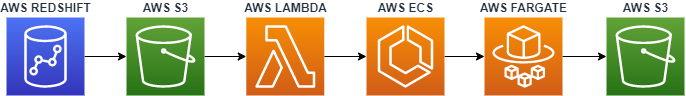 <br><br>
This workshop will be broken into three(3) sections: <br>
1) <b>Tensorflow 101</b> - What is tensorflow? In this section we will be looking into the machine learning library and diving into a few basic concepts such as: Tensors, graphs, Tensorboard, a practical example with explanation, and model persistence. By the end of this section you should know how to format data into tensors, how to train a basic tensorflow model, how to use tensorboard to understand model metrics, and how to persist your model outside a single instance.
<br><br>
2) <b>How to build a model pipeline in python</b> - In this section we will be going over what is essential for creating a pipeline that can be used to consume a model and produce results. We will be covering the following concepts: Querying a database from python, creating a rest API using Flask, interacting with a rest API, and uploading results to a database from python. By the end of this section you should know how to connect and query databases from python, how to create and interact with rest APIs, and how to upload data to a database. 
<br><br>
3) <b>Leveraging AWS to scale our pipeline</b> - In this section we will be looking at different AWS Tools that we can use to scale our pipeline. This section will cover the following concepts: Docker, AWS Lambda, AWS Elastic Container Registry, Elastic Container Services, and AWS S3. By the end of this section you should know what docker is and how to use it, how each AWS tool connects to a different section of our pipeline, and finally how we can scale these tools to account for larger datasets and speed.
<br><br>
For your convenience I have added the technical documentation to most of these concepts below. 
<br>

Tensorflow Documentation: https://www.tensorflow.org/api_docs/python/ <br>
Tensorboard Documentation: https://www.tensorflow.org/tensorboard/get_started<br>
AWS Tools:
- Lambda: https://docs.aws.amazon.com/lambda/latest/dg/welcome.html
- Elastic Container Registry: https://docs.aws.amazon.com/AmazonECR/latest/userguide/what-is-ecr.html
- Elastic Container Services: https://docs.aws.amazon.com/AmazonECS/latest/developerguide/Welcome.html
- S3: https://docs.aws.amazon.com/AmazonS3/latest/dev/Welcome.html

# Section 1: Tensorflow 101

What is a tensor, and why is it important?

A tensor is an array that can be sized anywhere from one(1) dimension to n dimensions. Its as simple as that, nothing too complicated going on here *yet*. This is the basic structure that makes up Tensorflow.

Tensors contain three(3) attributes:
- <b>Rank</b>: The rank of a tensor describes the dimensionality of the structure.

In [ ]:
# A rank of 0 defines a single point. Example:
Rank0_tensor = 4

In [ ]:
# A rank of 1 defines a list. Example:
Rank1_tensor = [1,2,3,4]

In [ ]:
# A rank of 2 defines a matrix. Example:
rank2_tensor = [[1,2,3],
                [4,5,6],
                [7,8,9]]

- <b>Shape</b>: The shape of a tensor defines the shape or length of the structure that has been created.  <br>
 In the first example the tensor has a shape of [] since it is a single point and not a list. <br>
 The second example has a shape of [3] since it is a list of length 3. <br>
 The third example has a shape of [3,3] give it has a width length of 3, and a hight length of 3.<br><br>
 
- <b>Type</b>: The type of a tensor is the data type of the values stored within the tensor. <br>
 In all of our examples the type of the data stored is an int32.<br><br>
 
 Example one(1) then is a tensor with the flowing tensorflow syntax tf.tensor(4, shape=(), dtype=int32)<br>
 Example two(2) then is a tensor with the flowing tensorflow syntax tf.tensor([1,2,3], shape=(3), dtype=int32)<br>
 Example three(3) then is a tensor with the flowing tensorflow syntax tf.tensor([[1,2,3],[4,5,6],[7,8,9]], shape=(3,3),<br>  dtype=int32) <br><br>
 
 This is a very basic overview of how the tensor data structure works and is all that will be needed for the dataset we will be operating on. If you have any questions regarding higher dimension tensors, batches, 
 and tensor operations, please refer to the Tensorflow Guide below: <br>
 https://www.tensorflow.org/guide/tensor
 

So now we know what a tensor is, but why is it important and why the heck is the library called Tensor<b>FLOW</b>?

Tensorflow is based on a "Graph" system. A "Graph" is a collection of operations that work together to run from input to output. These nodes can range from accepting inputs of tensors to calculating operations between inputs. When structured together these nodes create a structure similar to a graph! <br>
<img src="https://miro.medium.com/max/2042/1*zeXlzGhBoCl8clrpwtVbRQ.png" style="width:800px;height:400px;"> <br>
In this example we have a "Graph" with three(3) levels of nodes. The first column of nodes represents our input, in this case tensors of rank one(1). The second column is the first level of operators, and the last column is the final operator. <br>

This process will be significantly more complicated for Neural Nets, but the idea is the same. Below you will find the same idea expanded out to a network of neurons.
<img src="https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png" style = "width:800pc;height:400px">

So now we know a little bit about how tensors work and how they work together to give us an output. Lets put that to the test with a practical example, and generate a model.

In [2]:
# First we will need some data to work with. Lets use something pretty common and work from there. We will be downloading
# The Iris dataset from tensorflows storage. The iris dataset is a collection of data for different species of iris that have
# unique attributes, making it a great example of a classification model. 

# Lets import the libraries we will be working with.

# We will be using TensorFlow as our machine learning library. Tensorflow has both low and high level APIs and uses keras as
# its backend for python. Keras is also a machine learning library but it uses high level APIs. We will let tensorflow handle
# the easy stuff, and use keras to do the heavy lifting.
import tensorflow as tf

# Pandas is a great library to use for data manipulation and analysis. It is intuitive and has some great quailty of life
# features that we can use. 
import pandas as pd

# Requests is an HTTP requests library. This lets us use gets and posts against APIs
import requests
import io
import os

# This is a magic in-line command. It intializes our Tensorboard settings and lets the environment know we are going to be using
# it.
%load_ext tensorboard


# Here we are downloading the Iris train and test sets. Keras handles the heavy lifting and all we need to do is
# save the filepath. Otherwise we would use Requests to grab the content and use pandas to send that content to a file. 
train_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_filepath = tf.keras.utils.get_file(fname=os.path.basename(train_url),origin=train_url)

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_filepath = tf.keras.utils.get_file(fname=os.path.basename(test_url),origin=test_url)

Wow, we have some flower data, this is going to be super useful! <br><br> You have likely already seen this example done before so I will just point out the key componants we are interested in. Refer to Tensorflow's full guide here if you need to catch up: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

Lets go ahead and create a simple model.

In [4]:
import datetime
import numpy as np

# The Iris dataset has 5 columns, 4 features and 1 classifier. We are going to set the names and labels here. Batch size
# is the number of examples we want to use each iteration of training. We are using 32 becuase our google overlords did so.
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
batch_size = 32

# tf.data.experimental.make_csv_dataset is a recent addition to tensorflow (came in 2.0) and allows use to create a formatted
# dataset straight from the get go. It is a lot like the pandas function read_csv, but addtionally formats the data.
# Num_epochs is the number of times you run the ENTIRE dataset. If we had 64 items, we would have 2 batches, but 1 epoch.
train_dataset = tf.data.experimental.make_csv_dataset(
    train_filepath,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

test_dataset = tf.data.experimental.make_csv_dataset(
    test_filepath,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

# This function simply turns the features into an array, or in our case a tensor of rank 1! 
# We are going to apply this to our dataset so we can increase the complexity of our features.
# Feel free to put in some print statements to see what this kinda data looks like
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

train_dataset = train_dataset.map(pack_features_vector)
test_dataset = test_dataset.map(pack_features_vector)

# We are now going to define the specs of the model we want to use. There are two ways we can do this. We can call the model
# with the layers we want or we can call the model first, then add the layers using model.add(). 
# We are going to use the former for this demo.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

# The activation argument is basically how you want to setup the operations inside the computation nodes. We are using linear
# activations for this demo. A full list of arguments can be found here https://keras.io/api/layers/activations/

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)))
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(3))

# Here we are telling the model how to grade itself and how to make itself better. The loss represents how the model
# performed on the prediction vs the real. The optimizer uses this representation to "steer" the next iteration. 
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Define our metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')

# Dont get intimidated by this. We have gone over these concepts. The "tape" is recording the loss information.
# Then it applies that to the optimizer. Easy.
def train_step(model, optimizer, x_train, y_train):
    with tf.GradientTape() as tape:
        predictions = model(x_train, training=True)
        loss = loss_object(y_train, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss)
    train_accuracy(y_train, predictions)

# Just recording some metrics.
def test_step(model, x_test, y_test):
    predictions = model(x_test)
    loss = loss_object(y_test, predictions)

    test_loss(loss)
    test_accuracy(y_test, predictions)
    
# Here we are creating the logs needed to power and feed our Tensorboard
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

# Lets train our model and record our stats and logs.
EPOCHS = 5
for epoch in range(EPOCHS):
    for (x_train, y_train) in train_dataset:
        train_step(model, optimizer, x_train, y_train)
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss.result(), step=epoch)
        tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

    for (x_test, y_test) in test_dataset:
        test_step(model, x_test, y_test)
    with test_summary_writer.as_default():
        tf.summary.scalar('loss', test_loss.result(), step=epoch)
        tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)
    # Reset metrics every epoch
    train_loss.reset_states()
    test_loss.reset_states()
    train_accuracy.reset_states()
    test_accuracy.reset_states()

Lets take a look at our model in Tensorboard!

In [6]:
%tensorboard --logdir=logs/gradient_tape

Reusing TensorBoard on port 6006 (pid 17612), started 0:00:55 ago. (Use '!kill 17612' to kill it.)

Great! So now we have a model than can make predictions! But I don't want to have to keep opening up this notebook to be able to run predictions across a dataset.

<b> Model Persistence in Tensorflow </b> <br>

Lucky for us Tensorflow already has a module to help us handle this task.We will be using the SavedModel format method to mobilize our new model!

In [7]:
tf.saved_model.save(model, "My_new_saved_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: My_new_saved_model\assets


If you go ahead and check the current working directory youll find that we now have a folder called "My_new_saved_model". This folder contains the model object (.pb file) as well as some addtional metadata for the model (assest, varaibles, and Tensorboard logs).  

Now we have a mobile model object that we can use in any Notebook or python script that we want. Lets go ahead and test out the load function of SavedModel and invoke it in a python script.

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Generate some fake test data
test_data = np.random.uniform(low=2, high=8, size=(100,4))
tet_labels = 
test_data = pd.DataFrame(test_data)
test_data
#.to_csv('random_data_test.csv')
# test_dataset = tf.data.experimental.make_csv_dataset(
#     'random_data_test.csv',
#     batch_size,
#     column_names=column_names,
#     label_name=label_name,
#     num_epochs=1)

# test_dataset = test_dataset.map(pack_features_vector)

# model = tf.saved_model.load(r'C:\Users\andrew.downs\Desktop\Analytics Summit Resources\My_new_saved_model')

# predictions = model(test_data)

# print(predictions)

,0,1,2,3
0,7.527116,2.558679,7.608161,6.972513
1,6.057528,5.834152,6.623392,7.939759
2,6.931937,7.718628,3.416296,3.772357
3,6.421637,5.530263,6.114082,6.019903
4,4.096880,4.899508,3.504474,5.898207
...,...,...,...,...
95,7.786802,6.505929,3.963133,4.700409
96,2.403408,2.594876,5.779823,2.364755
97,4.913977,5.544697,7.045815,4.477620
98,6.136318,3.294999,7.758546,7.791317


Awesome, we've got some results back from loading a persistant model in a python script and having the script pass the test data to the model. 

## Section Summary: 
In this section we covered the key concepts that make up the basic structures of tensorflow. We covered the key arguments inside model creation such as optimizers, activation, and layers. And we also learned how to persist and read a saved model that has been generated. Do I need to include a picture here?


Lets now get into how to use this persistent model in a pipeline.

# Section 2: Data Pipeline

### ETL and database querying:
<img src = "https://miro.medium.com/max/3460/1*13uV1HSrv5NefuFo85lkrg.png" style = "width:400px;height:200px;"> <br><br>
Lets begin this section by breaking down the first relationship in our pipeline diagram, and view it as a general concept. 
<br><br>
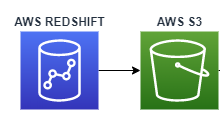
<br><br>
AWS Redshift is a data warehouse service in the cloud that operates off Postgresql protocol. Essentially its a cloud based database and its where we start our data pipeline. Assuming you already have a database configured and populated with your data, the first step to either train or create predictions is going to be move the data from its host location, to an environment that we can process it. We will be using python to carryout this process.<br>
This general concept is the ETL process, or extract / transform / load. 

In [ ]:
# The library we will be using for this process is psycopg2. Psycopg2 is a Postgresql adapter for python. It allows us to
# create a connection between our local environment and a database.
import psycopg2

# By giving the correct database credentials we connect to a database.
def conn_to_database():
    dbname = os.environ['REDSHIFT_DBNAME']
    port = os.environ['REDSHIFT_PORT']
    user = os.environ['REDSHIFT_USER']
    host = os.environ['REDSHIFT_HOST']
    pwd = os.environ['REDSHIFT_PASSWORD']
    conn_string = "dbname='{}' port='{}' user='{}' password='{}' host='{}'".format(dbname, port, user, pwd, host)
    conn = psycopg2.connect(conn_string)

    return conn


# SQL stands for Structured Query Langauge. This is the "language" we use to pull information from our database.
# Ive gone ahead and hardcoded an example query that pulls * (all) from a test table with the condition 'test'
# Youll notice the query is broken into three(3) parts. The first makes sure we are not adding onto an already created
# table. The second is our actual SQL. And the third is an unlaod statement. This unlaod statement allows us to automatically
# download our data to an external source, in our case an S3 bucket. 

sql_code = f"""
drop table if exsits tmp.Automated_Model_Consumption_Data;

Select *
into tmp.Automated_Model_Consumption_Data
from test_table
where data_category = 'test';

UNLOAD ('SELECT * from tmp.Automated_Model_Consumption_Data')
TO 's3://***********FILL OUT AT A LATER DATE**********'
CREDENTIALS 'aws_iam_role=arn:aws:iam::{credentials}'.
DELIMITER AS ',' ADDQUOTES PARALLEL OFF ALLOWOVERWRITE HEADER;
;
"""

# This is the format for kicking off the query we have not constructed. The commit argument is optional, but it is what
# persists the tables in our database, rather than just giving us results.
conn = conn_to_database()
cur = conn.cursor()
cur.execute(sql_code)
conn.commit()
conn.close()

### Data validation and  processing:
In order to process our data and run some basic validation, we will need to use python for this process. Luckily for us, we have actually already done this in the TensorFlow 101 section. This section is where we format our data to be compatible with the model imputs. This is also where any validation for datatypes needs to be completed. <br><br>

This process can be made simpler by using SQL to format your data. Preprocessing large chunks of data in python can be a slow task and can lead to long run times on what may be considered simple tasks. If you can pull your data from SQL and process it, do so. <br><br> The data in our example is currently sitting in the S3 bucket that we assigned it. Lets take a look at how to download that data and run some basic processing.

In [ ]:
# In order to interface with AWS we will be using the Boto3 library. Boto3 is the AWS SDK for python. It allows us to
# call AWS APIs for most of its services. In this case we are connecting to S3.
import boto3

# We need the correct AWS credentials so we dont get permissions blocked. 
def get_credentials(role):
    sts_client = boto3.client('sts')
    aclient = sts_client.assume_role(RoleArn="arn:aws:iam::{}".format(role),
                                     RoleSessionName="new-test-session")
    credentials = aclient['Credentials']

    return credentials

# This is where we initalize our connection to our specific S3 instance. 
def get_s3_client(bucket, role):
    credentials = get_credentials(role)
    s3 = boto3.client(
        's3',
        aws_access_key_id=credentials['AccessKeyId'],
        aws_secret_access_key=credentials['SecretAccessKey'],
        aws_session_token=credentials['SessionToken'],
        region_name='us-east-1'
    )

# Now we give those functions the correct items and boom! We have ourselves our data downloaded to where we want it saved to.
s3 = get_s3_client(bucket, role)
s3.download_file(bucket, key, file_loc)

# Once we have the file downlaoded we can carry out the same process we did for our tensorflow model. I will be using the same 
# example used in Tensorflow101.

train_dataset = tf.data.experimental.make_csv_dataset(
    file_loc,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
train_dataset = train_dataset.map(pack_features_vector)

### Model training and/or model consumption:
Now that we have our data downloaded and formatted we can do anything we want with it. We can use this next section to either train a new model or load in a model we have already created and run our data through it. Lets go ahead and train our model, we will be using the same method as the previous section without any of the fancy metric tracking. 

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def train_step(model, optimizer, x_train, y_train):
    with tf.GradientTape() as tape:
        predictions = model(x_train, training=True)
        loss = loss_object(y_train, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss(loss)
    train_accuracy(y_train, predictions)

# Lets train our model and record our stats and logs.
EPOCHS = 5
for epoch in range(EPOCHS):
    for (x_train, y_train) in train_dataset:
        train_step(model, optimizer, x_train, y_train)
        
tf.saved_model.save(model, "My_new_saved_model")

### Model Deployment:
The final step in our model pipeline is deploying our model so that we can use it to give us some predictions without having to constantly load it into a python script. We will be doing this by deploying it to an endpoint of a rest API. In order to do this we are going to set up a quick Flask Web Application. Flask is a micro web framework written in python, which is perfect because we love python. 

In [ ]:
import flask
from flask_restful import Api, Resource
import warnings
from flask import request
import datetime

app = flask.Flask(__name__)

api = Api(app)

warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', RuntimeWarning)

# Lets define our API with a few attributes. We want to define how the predictions are outputed (JSON vs CSV) and we want
# to define our post logic. Post means we are giving the api something, get means we are asking it for something.
class Api(Api):
    def __init__(self, *args, **kwargs):
        super(Api, self).__init__(*args, **kwargs)
        self.representations = {
            'application/json': self.output_json,
            'text/csv': self.output_csv,
            'application/csv': self.output_csv}

    @staticmethod
    @api.representation('application/json')
    def output_json(data, code, headers=None):
        try:
            resp = flask.make_response(data.to_json(orient='index'), code)
        except AttributeError:
            resp = flask.make_response(data, code)
        resp.headers.extend(headers or {})
        return resp

    @staticmethod
    @api.representation('application/csv')
    @api.representation('text/csv')
    def output_csv(data, code, headers=None):
        resp = flask.make_response(data.to_csv(), code)
        resp.headers.extend(headers or {
            "Content-DisposPredicition": 'attachment; filename="results.csv"'
        })
        return resp


class Invocations(Resource):
    @staticmethod
    def post():
        raw_data = flask.request.data.decode('utf-8')
        # You will potentially need to add addtional arguments here so that you can process your data. As it stands now
        # it is only feeding the raw csv that you pass to it. There are two(2) easy ways to do this processing. The first
        # is to just include that chunk of code here and let it all run here. This is messy, so I recommend the second way.
        # The second is to include a Utils file that handles all the processing for us and import the function here.
        # An example would look like this:
        import processing_function from Utils.py
        processed_data = processing_function(raw_data)
        model = tf.saved_model.load(r'C:\Users\andrew.downs\Desktop\Analytics Summit Resources\My_new_saved_model')
        predictions = model(processed_data)
        return (predictions, 200)

api.add_resource(Invocations, '/invocations')

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=8080, debug=True)


So now we have a webservice that can be used to return predictions when we make a post request agaisnt it. This is the final step in our model pipeline. We now have a process that allows us to pull data from a database and store it in cloud storage. Then we can download that data, process it, and train a model. And finally we can deploy that model to a webservice that allows us to post data to it and return the predictions directly to us. As it stands we have potentially 4 - 5 python scripts we have to run everytime we want to train a model and 2 - 3 that we have to run to even get a result from an already made model. <br><br>

In this next section we will leverage AWS to streamline this process to a single button press and scale out resources to handle the predictions.

# Section 3: AWS tools and how to use them <br>
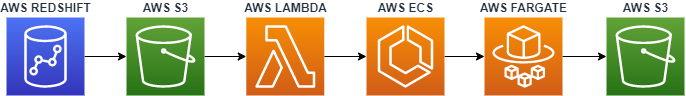
<br> We have already discussed the first relationship in this diagram, but we are now going to expand upon it. AWS Redshift is where we are housing our data, its the database where everything starts. AWS S3 is where we are going to store data that has been processed in someway, this is the middleman of the path between database to python script.<br><br>

Lets talk about AWS Lambda. "AWS Lambda is an event-driven, serverless computing platform provided by Amazon as a part of Amazon Web Services. It is a computing service that runs code in response to events and automatically manages the computing resources required by that code". In laymens terms, this means that Lambda is a small scale environment that can handle certain administrational tasks for us <b> AND </b> can be trigged by an event. In our case the trigger can be when that file shows up in S3. Thats right we can auto kick off a process via lambda just by putting a file into an S3 bucket. "But if its a small scale environment, how will I be able to run a largescale dataset through my predictions?" I hear you ask, and the answer is we cant. Lambda has a 15 min timer before it auto shuts down (cost savings). 

<br><br> <b> FEAR NOT! </b> <br><br>

This is where the Elastic Container Service comes in. But in order to talk about the ECS we need to talk about something called Docker.

<img src = 'https://miro.medium.com/proxy/1*9hGvYE5jegHm1r_97gH-jQ.png' style="width:500px;height:400px;">

Docker is a micro-services platform that enables developers to box up their applications and software bundles into containers. These containers contain all of the necessary files, libraries, and software needed to run the application! Another huge plus to using docker is that we can save these containers to Dockerhub or, in our case, AWS and be able to locate and use them from any device we need. <br><br>

<img src='https://www.docker.com/sites/default/files/d8/styles/large/public/2018-11/container-what-is-container.png?itok=vle7kjDj' style="width:500px;height:400px;">
Lets go ahead and put together a container for our model prediction application. What does a docker need to function? Besides having the docker toolbox installed the only addtional piece you will need is a Dockerfile. A dockerfile is a txt document that instructs docker how to build itself, what to include, and what to do when run! The basic structure looks like this:<br>
<code>
#This section shows the base image that you are pulling from. In our case the base environment is python 3.7
FROM python:3.7

#This is optional and is like a signature
MAINTAINER Andrew Downs <andrew.downs@perceptionhealth.com>

#Run some basic essentials
RUN apt-get update && \
	apt-get install -y gcc make apt-transport-https ca-certificates build-essential
    
#This section installs all of your dependencies
RUN pip install --upgrade pip
RUN pip install boto3
RUN pip install requests
RUN pip install pandas
RUN pip install psutil
RUN pip install regex
RUN pip install numpy
RUN pip install psycopg2
RUN pip install tensorflow

#This section copies all the files from the current working directory that you want included in your container
COPY Utils ./Utils/
COPY test_script.py .

#This section tells the container what to do upon spin up
CMD ["python","test_script.py"]
</code>

There are really only 2 steps required to <b> build </b> a docker container. <br>
1) Build: docker build --tag *name that youd like to use for your image* <br>
2) Push: docker push *your tag here* <br>

Of course you will need a location to push your newly built docker container! We <i> could </i> use dockerhub (the central location for docker images) or we can keep all this information to ourselfs and upload it to our ECR in our personal AWS account. Below, you will see an example of what the ECR looks like. I have included a few examples.

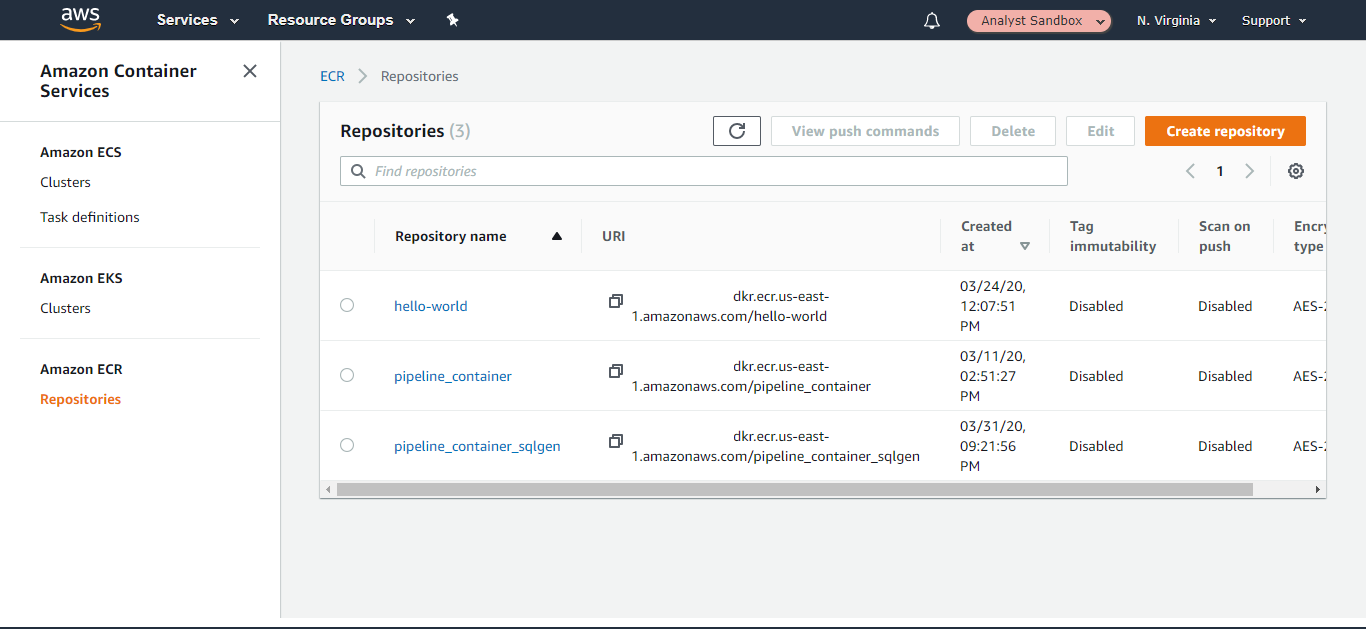 <br>

Once you have created a repo, AWS actually makes it very simple to build and use your container. If you click into a repo you will be given the exact commands needed to push your container. 



Lets quickly recap what we have to work with. <br>

1) We have AWS Redshift, this is our database. <br>
2) We have AWS Lambda which handles small time process in an environment spun up by Amazon. <br> 
3) And we have Docker images. These images contain all of the dependencies and libraires needed to run the software inside of them. This means we have the ability to store python scripts in self contained packages. <b> AND </b> we can save them to our personal AWS account under the ECR. 

### Using Docker in AWS
Lets go ahead and meet ECR's partner in crime, the ECS. The ECR and the ECS are two peas in a pod, they are complimentory systems to each other. The ECS (elastic container service) allows us to turn our docker images into tasks and then run our tasks within an environment that Amazon spins up for us, saving us from having to churn our CPUs and GPUs on training or consuming our models. The ECS allows us to set the settings on the environment however we'd like. More than that, it also allows for easy cooperation between our containers and easy invocations of these envrionments! <br><br>

Lets get back to our example. We have three(3) python scripts we are using. The first generates and runs the SQL that extracts the data from our database. The second downloads and processes our queried data. And third, we spin up a web server that contains our model. 

As an example we are going to use the ECS API to create a task that uses two(2) docker images that are going to work together. These two images will be our processing script and our web service script. So when we run this task, its going to download our data from S3, process it, and then feed it to the web service model to return some predictions. 

In [ ]:
import boto3
import os
import re
import json

# We need to define some parameters to how we want to spin up an environment to run our images. Lets take a look at a typical
# ECS Task definition with two images. 
def getTaskDef():
    NV = None
    taskdef = {
        "executionRoleArn": "arn:aws:iam::{your role here}",
        "containerDefinitions":
            [
                {
                    "logConfiguration":
                        {
                            "logDriver": "awslogs",
                            "options":
                                {
                                    "awslogs-group": "/ecs/" + {Container Name},
                                    "awslogs-region": "us-east-1",
                                    "awslogs-stream-prefix": "ecs",
                                    "awslogs-create-group": "true"
                                }
                        },
                    "portMappings": [],
                    "cpu": 0,
                    "environment": containerenvvars,
                    "mountPoints": [],
                    "memoryReservation": 12000,
                    "volumesFrom": [],
                    "image": "{Our image ARN here}" + {Container Name},
                    "essential": True,
                    "name": {Container Name}
                },
                {
                    "logConfiguration":
                        {
                            "logDriver": "awslogs",
                            "options":
                                {
                                    "awslogs-group": "/ecs/" + {Container Name},
                                    "awslogs-region": "us-east-1",
                                    "awslogs-stream-prefix": "ecs",
                                    "awslogs-create-group": "true"
                                }
                        },
                    "portMappings":
                        [
                            {
                                "hostPort": 8080,
                                "protocol": "tcp",
                                "containerPort": 8080
                            }
                        ],
                    "cpu": 0,
                    "environment":
                        [
                            {
                                "name": "ACCESS_KEY",
                                "value": ""
                            },
                            {
                                "name": "SECRET_KEY",
                                "value": ""
                            },
                            {
                                "name": "TOKEN",
                                "value": ""
                            }
                        ],
                    "mountPoints": [],
                    "memoryReservation": 4000,
                    "volumesFrom": [],
                    "image": "{Our image ARN here}" + {Container Name},
                    "essential": True,
                    "name": containername + "-predict"
                }
            ],
        "placementConstraints": [],
        "memory": "16384",
        "taskRoleArn": "arn:aws:iam::{credentials}",
        "compatibilities":
            [
                "EC2",
                "FARGATE"
            ],
        "taskDefinitionArn": "{Our image ARN here}" + {Container Name},
        "family": {Container Name},
        "requiresAttributes":
            [
                {
                    "name": "com.amazonaws.ecs.capability.logging-driver.awslogs"
                },
                {
                    "name": "ecs.capability.execution-role-awslogs"
                },
                {
                    "name": "com.amazonaws.ecs.capability.ecr-auth"
                },
                {
                    "name": "com.amazonaws.ecs.capability.docker-remote-api.1.19"
                },
                {
                    "name": "com.amazonaws.ecs.capability.docker-remote-api.1.21"
                },
                {
                    "name": "com.amazonaws.ecs.capability.task-iam-role"
                },
                {
                    "name": "ecs.capability.execution-role-ecr-pull"
                },
                {
                    "name": "com.amazonaws.ecs.capability.docker-remote-api.1.18"
                },
                {
                    "name": "ecs.capability.task-eni"
                }
            ],
        "requiresCompatibilities":
            [
                "FARGATE"
            ],
        "networkMode": "awsvpc",
        "cpu": "2048",
        "revision": 1,
        "status": "ACTIVE",
        "volumes": []
    }

    return taskdef


def create_task(containername, containertype, containerenvvars):
    client = boto3.client('ecs')

    taskDef = getTaskDef(containername, containertype, containerenvvars)

    ecsresponse = client.register_task_definition(
        family=taskDef["family"],
        taskRoleArn=taskDef["taskRoleArn"],
        executionRoleArn=taskDef["executionRoleArn"],
        networkMode=taskDef["networkMode"],
        containerDefinitions=taskDef["containerDefinitions"],
        volumes=taskDef["volumes"],
        placementConstraints=taskDef["placementConstraints"],
        requiresCompatibilities=taskDef["requiresCompatibilities"],
        cpu=taskDef["cpu"],
        memory=taskDef["memory"]
    )

    return ecsresponse

create_task()

We can also do this for the SQL generation script inside a task with a single image. The beautiful part is that we can put that task generation and run <b> inside of a lambda function </b>. This means we can use a lambda function to kick off the task that generates our SQL data and unloads it to S3, which then triggers another lambda that kicks off a task that downlaods and processes our data and pass it to the model web server. The image below will show the process:

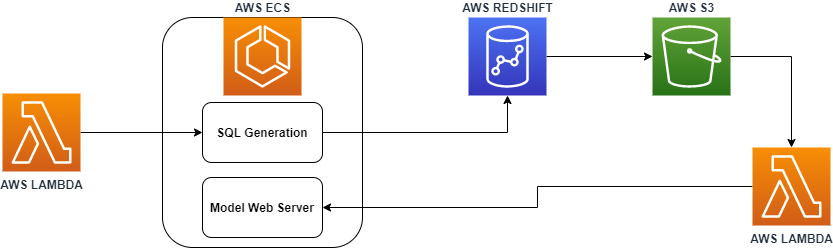

That means this entire process can be kicked off with a single function call from the AWS API.

In [ ]:
credentials = get_credentials(role=role)

client = boto3.client(
    'lambda',
    aws_access_key_id=credentials['AccessKeyId'],
    aws_secret_access_key=credentials['SecretAccessKey'],
    aws_session_token=credentials['SessionToken'],
    region_name='us-east-1'
)
    
client.invoke(
    FunctionName=lambda_arn_string, # Here is our lambda ARN string
    InvocationType='RequestResponse',
    LogType='None'
)